# Exploring measurements from fews

In this notebook, you will experiment how to use the `hydropandas` package to access, visualize and explore meta data from the FEWS database. More information on FEWS can be found on their [website](https://oss.deltares.nl/web/delft-fews/).

## <a id=top></a>Notebook contents

1. [FEWS xml files](#xml)
2. [Directory with xml files](#dir)
3. [Connect to a FEWS database](#db)

In [39]:
import os
import requests

import hydropandas as hpd
import matplotlib.pyplot as plt

In [2]:
hpd.util.get_color_logger("INFO")

<RootLogger root (INFO)>

## FEWS xml files <a id=xml></a>

You can read FEWS xml files using the code below. First we download the xml files and put them in the 'fewsdata' directory.

In [42]:
# download test file
if not os.path.exists("./fewsdata"):
    os.mkdir("./fewsdata")
xml_file_url = "https://raw.githubusercontent.com/ArtesiaWater/hydropandas/refs/heads/master/tests/data/2019-FEWS-test/test_wsvv_fews.xml"
r = requests.get(xml_file_url)
with open("./fewsdata/test_wsvv_fews.xml", "w+") as f:
    f.write(r.text)

The file 'test_wsvv_fews.xml' contains data from a radar. We can read the data in this file using the `read_fews` function. 

Note: The `read_fews` function will always return a collection of observations (ObsCollection) because a single xml file can have multiple observations.

In [59]:
# read a single xml file
fname = "./fewsdata/test_wsvv_fews.xml"
oc = hpd.read_fews(fname, ObsClass=hpd.MeteoObs)
oc

INFO:hydropandas.io.fews:1/1 read test_wsvv_fews.xml
INFO:hydropandas.io.fews:reading FEWS_RADAR_241
INFO:hydropandas.io.fews:reading FEWS_RADAR_241


,x,y,filename,source,unit,station,meteo_var,obs
name,,,,,,,,
FEWS_RADAR_241_P.radar.h,161278.0,454989.0,,FEWS,mm,NaN,P.radar.h,MeteoObs FEWS_RADAR_241_P.radar.h -----metadat...
FEWS_RADAR_241_Eact.d,161278.0,454989.0,,FEWS,mm,NaN,Eact.d,MeteoObs FEWS_RADAR_241_Eact.d -----metadata--...


Now we can visualise the data like we any ObsCollection.

<Axes: ylabel='Eact [mm/d]'>

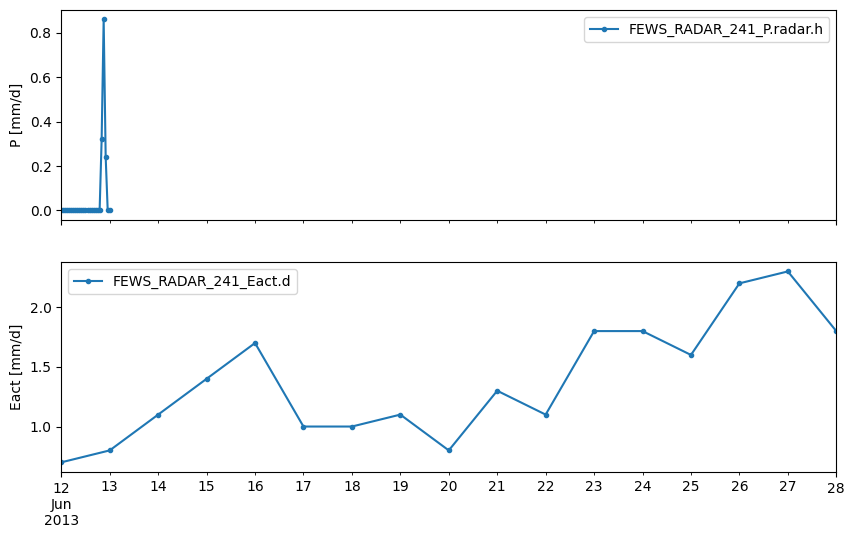

In [60]:
# plot the measurements
f, axes = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
oc.get_obs("FEWS_RADAR_241_P.radar.h")["value"].plot(
    ax=axes[0], marker=".", legend=True, ylabel="P [mm/d]"
)
oc.get_obs("FEWS_RADAR_241_Eact.d")["value"].plot(
    ax=axes[1], marker=".", legend=True, ylabel="Eact [mm/d]"
)

## Directory with xml files <a id=dir></a>

We can also read a whole zipfile with xml files at once.

In [61]:
# download zip directory
zip_file_url = "https://github.com/ArtesiaWater/hydropandas/raw/refs/heads/master/tests/data/2019-FEWS-test/WaalenBurg_201810-20190215_prod.zip"
r = requests.get(zip_file_url)
with open("./fewsdata/WaalenBurg_201810-20190215_prod.zip", "wb") as f:
    f.write(r.content)

In [62]:
# read a zipfile
fdir = "./fewsdata/WaalenBurg_201810-20190215_prod.zip"
oc = hpd.read_fews(fdir)
oc

INFO:hydropandas.io.fews:1/1 read WaalenBurg_201810-20190215_prod.xml
INFO:hydropandas.io.fews:reading MPN-N-1
INFO:hydropandas.io.fews:reading MPN-N-2


,x,y,filename,source,unit,monitoring_well,tube_nr,screen_top,screen_bottom,ground_level,tube_top,metadata_available,obs
name,,,,,,,,,,,,,
MPN-N-1_H.meting,115535.9882,567867.7001,,FEWS,mNAP,MPN-N-1,,NaN,NaN,NaN,NaN,True,GroundwaterObs MPN-N-1_H.meting -----metadata-...
MPN-N-2_H.meting,115294.9832,567758.8142,,FEWS,mNAP,MPN-N-2,,NaN,NaN,NaN,NaN,True,GroundwaterObs MPN-N-2_H.meting -----metadata-...


<Axes: ylabel='m NAP'>

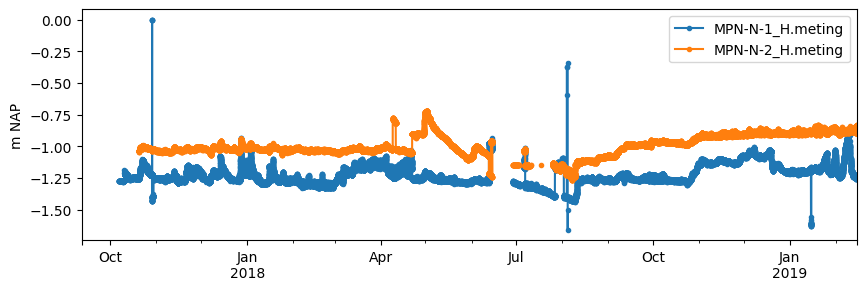

In [63]:
# plot the measurements
f, ax = plt.subplots(figsize=(10, 3))
oc.get_obs("MPN-N-1_H.meting")["value"].plot(
    ax=ax, marker=".", legend=True, ylabel="m NAP"
)
oc.get_obs("MPN-N-2_H.meting")["value"].plot(
    ax=ax, marker=".", legend=True, ylabel="m NAP"
)

## Connect to a FEWS database <a id=db></a>

It is also possible to connect to a FEWS database and obtain the data directly without having to make a file dump. For this you need to have:
1. Access to the database
2. An endpoint (url) for the database
3. A location ID from a measurement point in the database

If you have these you can set the variables below and obtain the measurements.

In [ ]:
# put here the URL of your fews database
fews_db_url = ""  # enter fews database url here
location_id = ""  # enter location id here

# read as observation objects
params = {
    "locationIds": location_id,
    "documentVersion": "1.26",
    "documentFormat": "PI_XML",
}

r = requests.get(fews_db_url, params=params, verify=True)
xmlstring = r.text

oc = hpd.ObsCollection.from_fews_xml(
    xmlstring=xmlstring,
    ObsClass=hpd.Obs,
    low_memory=False,
)

oc